# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Load Dataset

In [2]:
df = pd.read_csv('comprehensive_banking_database.csv')
df

,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,...,Minimum Payment Due,Payment Due Date,Last Credit Card Payment Date,Rewards Points,Feedback ID,Feedback Date,Feedback Type,Resolution Status,Resolution Date,Anomaly
0,1,Joshua,Hall,45,Male,Address_1,Fort Worth,19458794854,joshua.hall@kag.com,Current,...,226.22,11/26/2023,3/20/2023,8142,1,10/6/2023,Suggestion,Resolved,1/22/2023,1
1,2,Mark,Taylor,47,Female,Address_2,Louisville,19458794855,mark.taylor@kag.com,Current,...,42.84,11/5/2023,6/16/2023,4306,2,4/7/2023,Complaint,Resolved,8/27/2023,1
2,3,Joseph,Flores,25,Female,Address_3,Philadelphia,19458794856,joseph.flores@kag.com,Current,...,162.12,1/8/2023,3/20/2023,4842,3,9/7/2023,Praise,Pending,5/11/2023,1
3,4,Kevin,Lee,52,Other,Address_4,Oklahoma City,19458794857,kevin.lee@kag.com,Savings,...,216.46,9/8/2023,10/15/2023,9463,4,5/28/2023,Complaint,Resolved,7/5/2023,1
4,5,Linda,Johnson,68,Other,Address_5,Phoenix,19458794858,linda.johnson@kag.com,Savings,...,1.29,3/4/2023,7/27/2023,2209,5,2/12/2023,Complaint,Resolved,11/21/2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Emily,Sanchez,21,Other,Address_4996,Mesa,19458799849,emily.sanchez@kag.com,Savings,...,100.86,7/19/2023,2/10/2023,7530,4996,4/12/2023,Complaint,Pending,1/23/2023,1
4996,4997,Melissa,Perez,27,Female,Address_4997,Los Angeles,19458799850,melissa.perez@kag.com,Savings,...,42.67,2/16/2023,12/24/2023,8796,4997,9/7/2023,Complaint,Pending,9/17/2023,1
4997,4998,Timothy,Walker,45,Female,Address_4998,Louisville,19458799851,timothy.walker@kag.com,Current,...,11.42,2/23/2023,9/6/2023,9966,4998,10/23/2023,Suggestion,Resolved,2/5/2023,1
4998,4999,Deborah,Nelson,58,Female,Address_4999,Detroit,19458799852,deborah.nelson@kag.com,Current,...,16.27,9/8/2023,1/12/2023,538,4999,5/20/2023,Complaint,Pending,3/3/2023,1


### Explore The Dataset

In [3]:
df.shape

(5000, 40)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        5000 non-null   int64  
 1   First Name                         5000 non-null   object 
 2   Last Name                          5000 non-null   object 
 3   Age                                5000 non-null   int64  
 4   Gender                             5000 non-null   object 
 5   Address                            5000 non-null   object 
 6   City                               5000 non-null   object 
 7   Contact Number                     5000 non-null   int64  
 8   Email                              5000 non-null   object 
 9   Account Type                       5000 non-null   object 
 10  Account Balance                    5000 non-null   float64
 11  Date Of Account Opening            5000 non-null   objec

In [8]:
df.describe()

,Customer ID,Age,Contact Number,Account Balance,TransactionID,Transaction Amount,Account Balance After Transaction,Branch ID,Loan ID,Loan Amount,Interest Rate,Loan Term,CardID,Credit Limit,Credit Card Balance,Minimum Payment Due,Rewards Points,Feedback ID,Anomaly
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,43.469800,1.945880e+10,5060.570918,2500.500000,2508.501144,5037.418898,50.586800,2500.500000,25501.042806,5.505038,36.520800,2500.500000,5549.035830,2487.40084,124.370134,4966.161800,2500.500000,0.880000
std,1443.520003,15.145672,1.443520e+03,2849.356481,1443.520003,1450.194986,4053.220017,28.499539,1443.520003,14039.732628,2.629752,16.924315,1443.520003,2581.718105,1446.80295,72.340102,2901.410915,1443.520003,0.475021
min,1.000000,18.000000,1.945879e+10,107.200000,1.000000,10.570000,-4878.760000,1.000000,1.000000,1006.370000,1.000000,12.000000,1.000000,1007.000000,1.45000,0.070000,1.000000,1.000000,-1.000000
25%,1250.750000,30.000000,1.945880e+10,2582.777500,1250.750000,1241.150000,2047.205000,26.000000,1250.750000,13315.305000,3.200000,24.000000,1250.750000,3314.065000,1243.51750,62.180000,2475.250000,1250.750000,1.000000
50%,2500.500000,43.000000,1.945880e+10,5075.500000,2500.500000,2494.025000,5089.785000,50.000000,2500.500000,25909.705000,5.520000,36.000000,2500.500000,5567.485000,2461.62000,123.080000,4950.500000,2500.500000,1.000000
75%,3750.250000,57.000000,1.945880e+10,7509.760000,3750.250000,3796.222500,8036.367500,75.000000,3750.250000,37441.570000,7.832500,48.000000,3750.250000,7786.040000,3722.58000,186.125000,7483.250000,3750.250000,1.000000
max,5000.000000,69.000000,1.945880e+10,9998.110000,5000.000000,4998.390000,14911.380000,99.000000,5000.000000,49993.490000,10.000000,60.000000,5000.000000,9997.780000,4997.11000,249.860000,9999.000000,5000.000000,1.000000


In [9]:
df.nunique()

Customer ID                          5000
First Name                             50
Last Name                              50
Age                                    52
Gender                                  3
Address                              5000
City                                   40
Contact Number                       5000
Email                                2139
Account Type                            2
Account Balance                      4991
Date Of Account Opening              3738
Last Transaction Date                 365
TransactionID                        5000
Transaction Date                      365
Transaction Type                        3
Transaction Amount                   4972
Account Balance After Transaction    4984
Branch ID                              99
Loan ID                              5000
Loan Amount                          5000
Loan Type                               3
Interest Rate                         900
Loan Term                         

In [10]:
df

,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,...,Minimum Payment Due,Payment Due Date,Last Credit Card Payment Date,Rewards Points,Feedback ID,Feedback Date,Feedback Type,Resolution Status,Resolution Date,Anomaly
0,1,Joshua,Hall,45,Male,Address_1,Fort Worth,19458794854,joshua.hall@kag.com,Current,...,226.22,11/26/2023,3/20/2023,8142,1,10/6/2023,Suggestion,Resolved,1/22/2023,1
1,2,Mark,Taylor,47,Female,Address_2,Louisville,19458794855,mark.taylor@kag.com,Current,...,42.84,11/5/2023,6/16/2023,4306,2,4/7/2023,Complaint,Resolved,8/27/2023,1
2,3,Joseph,Flores,25,Female,Address_3,Philadelphia,19458794856,joseph.flores@kag.com,Current,...,162.12,1/8/2023,3/20/2023,4842,3,9/7/2023,Praise,Pending,5/11/2023,1
3,4,Kevin,Lee,52,Other,Address_4,Oklahoma City,19458794857,kevin.lee@kag.com,Savings,...,216.46,9/8/2023,10/15/2023,9463,4,5/28/2023,Complaint,Resolved,7/5/2023,1
4,5,Linda,Johnson,68,Other,Address_5,Phoenix,19458794858,linda.johnson@kag.com,Savings,...,1.29,3/4/2023,7/27/2023,2209,5,2/12/2023,Complaint,Resolved,11/21/2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Emily,Sanchez,21,Other,Address_4996,Mesa,19458799849,emily.sanchez@kag.com,Savings,...,100.86,7/19/2023,2/10/2023,7530,4996,4/12/2023,Complaint,Pending,1/23/2023,1
4996,4997,Melissa,Perez,27,Female,Address_4997,Los Angeles,19458799850,melissa.perez@kag.com,Savings,...,42.67,2/16/2023,12/24/2023,8796,4997,9/7/2023,Complaint,Pending,9/17/2023,1
4997,4998,Timothy,Walker,45,Female,Address_4998,Louisville,19458799851,timothy.walker@kag.com,Current,...,11.42,2/23/2023,9/6/2023,9966,4998,10/23/2023,Suggestion,Resolved,2/5/2023,1
4998,4999,Deborah,Nelson,58,Female,Address_4999,Detroit,19458799852,deborah.nelson@kag.com,Current,...,16.27,9/8/2023,1/12/2023,538,4999,5/20/2023,Complaint,Pending,3/3/2023,1


## Exploratory Data Analysis

In [11]:
df.rename({"Date Of Account Opening": "Date_Of_Account_Opening",
           "Last Transaction Date": "Last_Transaction_Date",
           "Transaction Date": "Transaction_Date",
           "Approval/Rejection Date": "Approval/Rejection_Date",
           "Payment Due Date": "Payment_Due_Date",
           "Last Credit Card Payment Date": "Last_Credit_Card_Payment_Date",
           "Feedback Date": "Feedback_Date",
           "Resolution Date": "Resolution_Date"}, axis=1, inplace=True)
df

,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,...,Minimum Payment Due,Payment_Due_Date,Last_Credit_Card_Payment_Date,Rewards Points,Feedback ID,Feedback_Date,Feedback Type,Resolution Status,Resolution_Date,Anomaly
0,1,Joshua,Hall,45,Male,Address_1,Fort Worth,19458794854,joshua.hall@kag.com,Current,...,226.22,11/26/2023,3/20/2023,8142,1,10/6/2023,Suggestion,Resolved,1/22/2023,1
1,2,Mark,Taylor,47,Female,Address_2,Louisville,19458794855,mark.taylor@kag.com,Current,...,42.84,11/5/2023,6/16/2023,4306,2,4/7/2023,Complaint,Resolved,8/27/2023,1
2,3,Joseph,Flores,25,Female,Address_3,Philadelphia,19458794856,joseph.flores@kag.com,Current,...,162.12,1/8/2023,3/20/2023,4842,3,9/7/2023,Praise,Pending,5/11/2023,1
3,4,Kevin,Lee,52,Other,Address_4,Oklahoma City,19458794857,kevin.lee@kag.com,Savings,...,216.46,9/8/2023,10/15/2023,9463,4,5/28/2023,Complaint,Resolved,7/5/2023,1
4,5,Linda,Johnson,68,Other,Address_5,Phoenix,19458794858,linda.johnson@kag.com,Savings,...,1.29,3/4/2023,7/27/2023,2209,5,2/12/2023,Complaint,Resolved,11/21/2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Emily,Sanchez,21,Other,Address_4996,Mesa,19458799849,emily.sanchez@kag.com,Savings,...,100.86,7/19/2023,2/10/2023,7530,4996,4/12/2023,Complaint,Pending,1/23/2023,1
4996,4997,Melissa,Perez,27,Female,Address_4997,Los Angeles,19458799850,melissa.perez@kag.com,Savings,...,42.67,2/16/2023,12/24/2023,8796,4997,9/7/2023,Complaint,Pending,9/17/2023,1
4997,4998,Timothy,Walker,45,Female,Address_4998,Louisville,19458799851,timothy.walker@kag.com,Current,...,11.42,2/23/2023,9/6/2023,9966,4998,10/23/2023,Suggestion,Resolved,2/5/2023,1
4998,4999,Deborah,Nelson,58,Female,Address_4999,Detroit,19458799852,deborah.nelson@kag.com,Current,...,16.27,9/8/2023,1/12/2023,538,4999,5/20/2023,Complaint,Pending,3/3/2023,1


In [12]:
df['Date_Of_Account_Opening'] = pd.to_datetime(df['Date_Of_Account_Opening'], errors='coerce')

In [13]:
df['Last_Transaction_Date'] = pd.to_datetime(df['Last_Transaction_Date'], errors='coerce')

In [14]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], errors='coerce')

In [15]:
df['Approval/Rejection_Date'] = pd.to_datetime(df['Approval/Rejection_Date'], errors='coerce')

In [16]:
df['Payment_Due_Date'] = pd.to_datetime(df['Payment_Due_Date'], errors='coerce')

In [17]:
df['Last_Credit_Card_Payment_Date'] = pd.to_datetime(df['Last_Credit_Card_Payment_Date'], errors='coerce')

In [18]:
df['Feedback_Date'] = pd.to_datetime(df['Feedback_Date'], errors='coerce')

In [19]:
df['Resolution_Date'] = pd.to_datetime(df['Resolution_Date'], errors='coerce')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Customer ID                        5000 non-null   int64         
 1   First Name                         5000 non-null   object        
 2   Last Name                          5000 non-null   object        
 3   Age                                5000 non-null   int64         
 4   Gender                             5000 non-null   object        
 5   Address                            5000 non-null   object        
 6   City                               5000 non-null   object        
 7   Contact Number                     5000 non-null   int64         
 8   Email                              5000 non-null   object        
 9   Account Type                       5000 non-null   object        
 10  Account Balance                    5

In [21]:
df.isna().sum()

Customer ID                          0
First Name                           0
Last Name                            0
Age                                  0
Gender                               0
Address                              0
City                                 0
Contact Number                       0
Email                                0
Account Type                         0
Account Balance                      0
Date_Of_Account_Opening              0
Last_Transaction_Date                0
TransactionID                        0
Transaction_Date                     0
Transaction Type                     0
Transaction Amount                   0
Account Balance After Transaction    0
Branch ID                            0
Loan ID                              0
Loan Amount                          0
Loan Type                            0
Interest Rate                        0
Loan Term                            0
Approval/Rejection_Date              0
Loan Status              

In [22]:
df.duplicated().sum()

0

In [23]:
df.fillna(0, inplace=True)
df

,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,...,Minimum Payment Due,Payment_Due_Date,Last_Credit_Card_Payment_Date,Rewards Points,Feedback ID,Feedback_Date,Feedback Type,Resolution Status,Resolution_Date,Anomaly
0,1,Joshua,Hall,45,Male,Address_1,Fort Worth,19458794854,joshua.hall@kag.com,Current,...,226.22,2023-11-26,2023-03-20,8142,1,2023-10-06,Suggestion,Resolved,2023-01-22,1
1,2,Mark,Taylor,47,Female,Address_2,Louisville,19458794855,mark.taylor@kag.com,Current,...,42.84,2023-11-05,2023-06-16,4306,2,2023-04-07,Complaint,Resolved,2023-08-27,1
2,3,Joseph,Flores,25,Female,Address_3,Philadelphia,19458794856,joseph.flores@kag.com,Current,...,162.12,2023-01-08,2023-03-20,4842,3,2023-09-07,Praise,Pending,2023-05-11,1
3,4,Kevin,Lee,52,Other,Address_4,Oklahoma City,19458794857,kevin.lee@kag.com,Savings,...,216.46,2023-09-08,2023-10-15,9463,4,2023-05-28,Complaint,Resolved,2023-07-05,1
4,5,Linda,Johnson,68,Other,Address_5,Phoenix,19458794858,linda.johnson@kag.com,Savings,...,1.29,2023-03-04,2023-07-27,2209,5,2023-02-12,Complaint,Resolved,2023-11-21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Emily,Sanchez,21,Other,Address_4996,Mesa,19458799849,emily.sanchez@kag.com,Savings,...,100.86,2023-07-19,2023-02-10,7530,4996,2023-04-12,Complaint,Pending,2023-01-23,1
4996,4997,Melissa,Perez,27,Female,Address_4997,Los Angeles,19458799850,melissa.perez@kag.com,Savings,...,42.67,2023-02-16,2023-12-24,8796,4997,2023-09-07,Complaint,Pending,2023-09-17,1
4997,4998,Timothy,Walker,45,Female,Address_4998,Louisville,19458799851,timothy.walker@kag.com,Current,...,11.42,2023-02-23,2023-09-06,9966,4998,2023-10-23,Suggestion,Resolved,2023-02-05,1
4998,4999,Deborah,Nelson,58,Female,Address_4999,Detroit,19458799852,deborah.nelson@kag.com,Current,...,16.27,2023-09-08,2023-01-12,538,4999,2023-05-20,Complaint,Pending,2023-03-03,1


In [24]:
num_cols = ['Age', 'TransactionID', 'Account Balance', 'Transaction Amount', 'Account Balance After Transaction', 'Branch ID', 'Loan Amount', 'Loan Term', 'Interest Rate', 'Credit Limit', 'Credit Card Balance', 'Minimum Payment Due', 'Rewards Points', 'Anomaly']
cat_cols = ['Gender', 'City', 'Account Type', 'Transaction Type', 'Loan Type', 'Loan Status', 'Card Type', 'Feedback Type', 'Resolution Status']

print(len(num_cols))
print(len(cat_cols))

14
9


In [25]:
colors = ['#27708C', '#539DA6', '#75BFB8', '#F2F2F2', '#89D9CA', '#357C8C', '#175973', '#152623']

## Visualization

### 1. Histogram Of Num_Cols

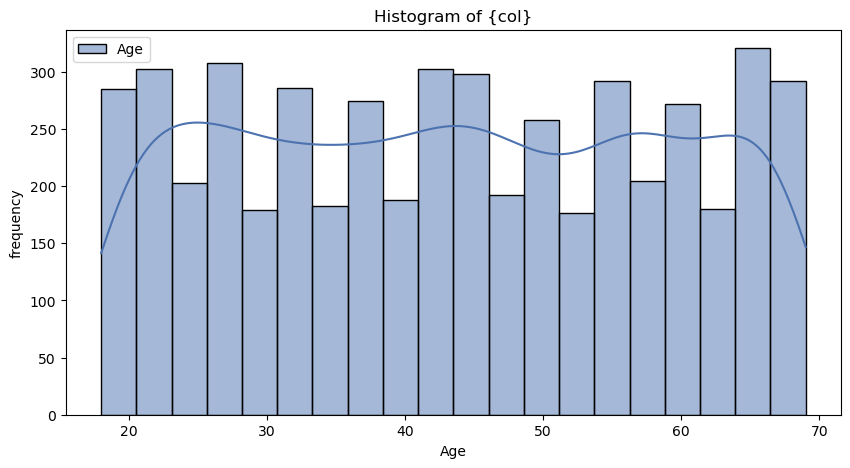

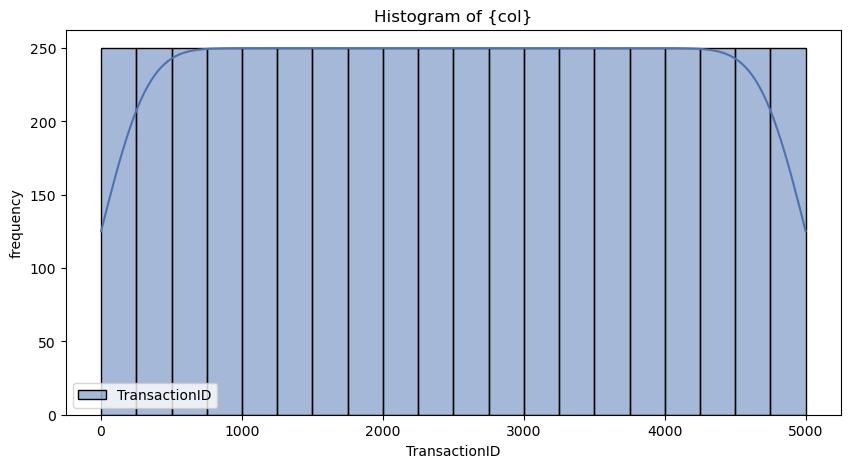

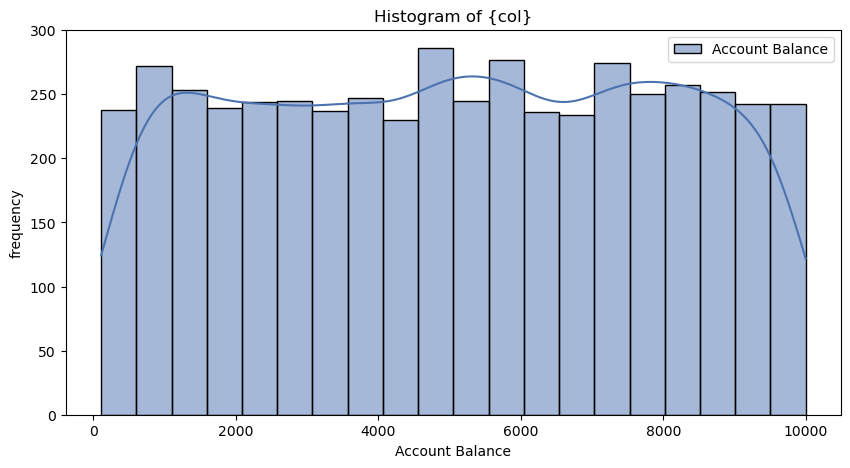

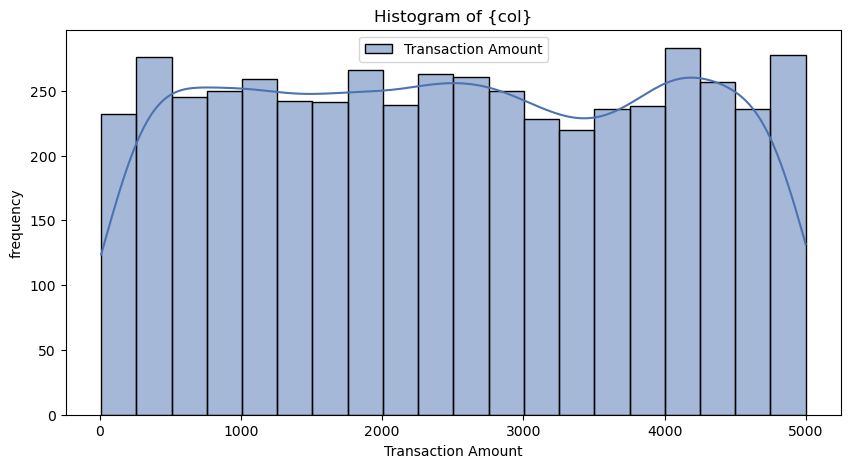

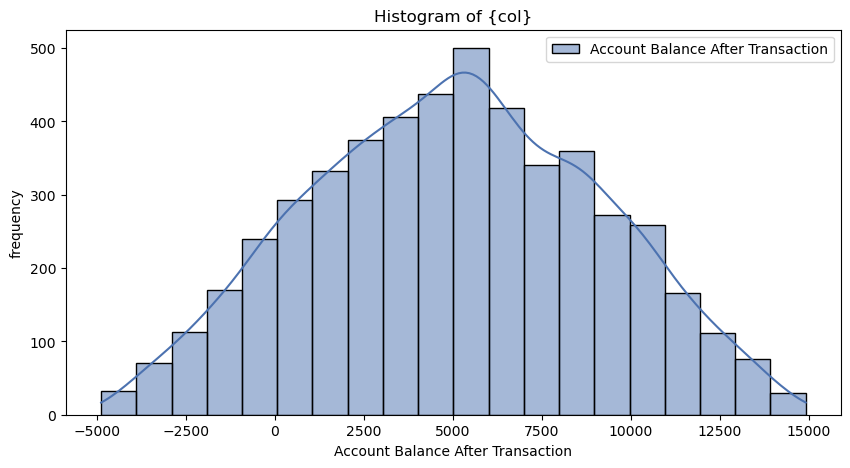

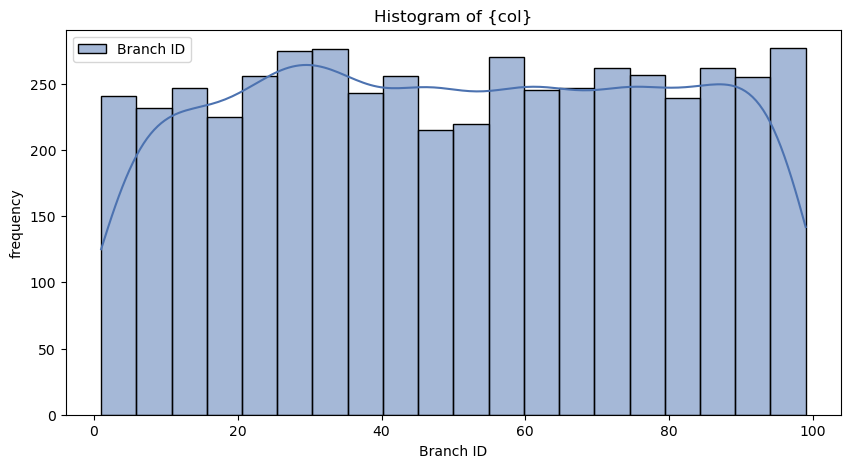

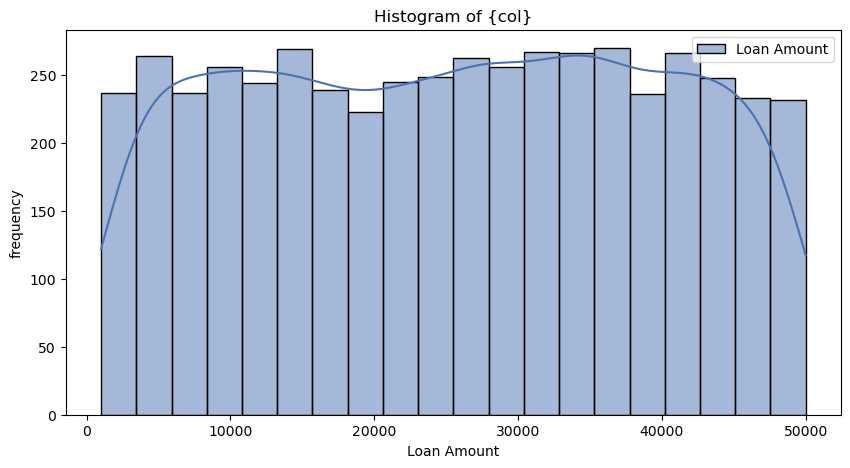

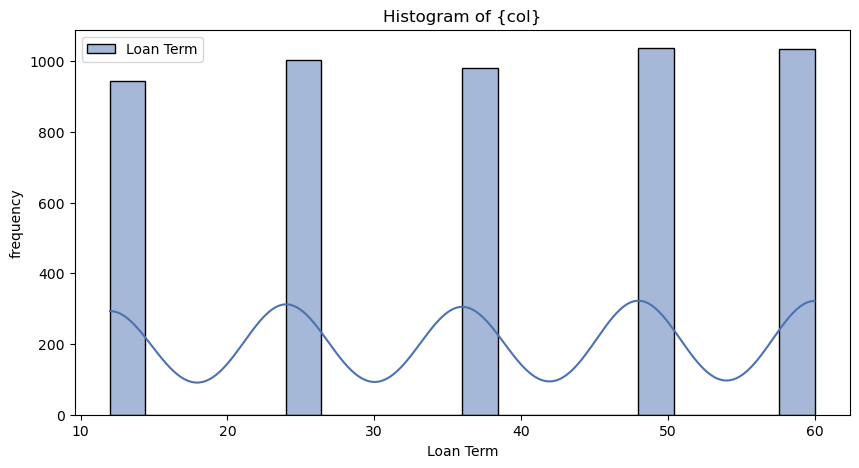

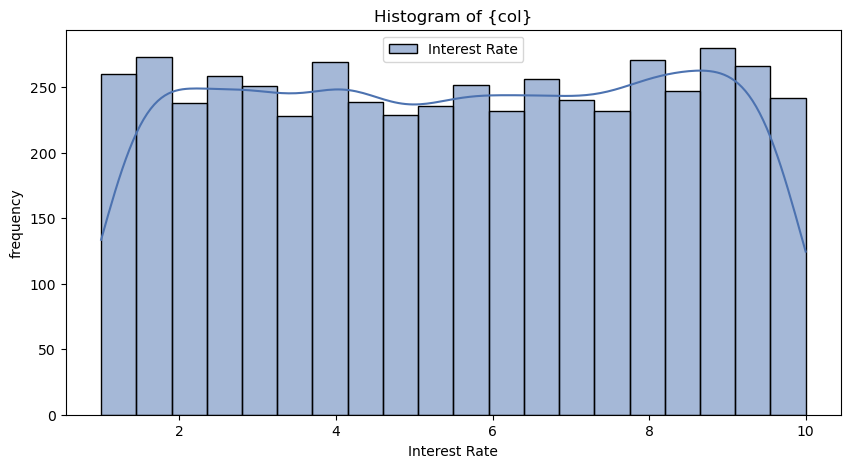

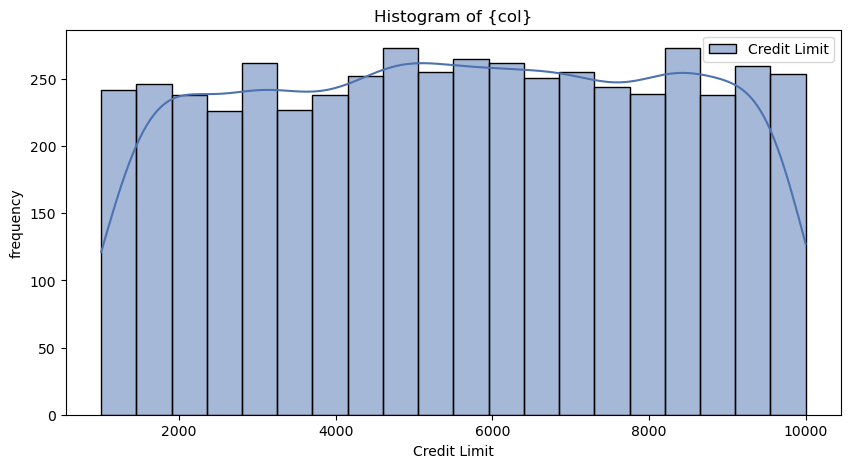

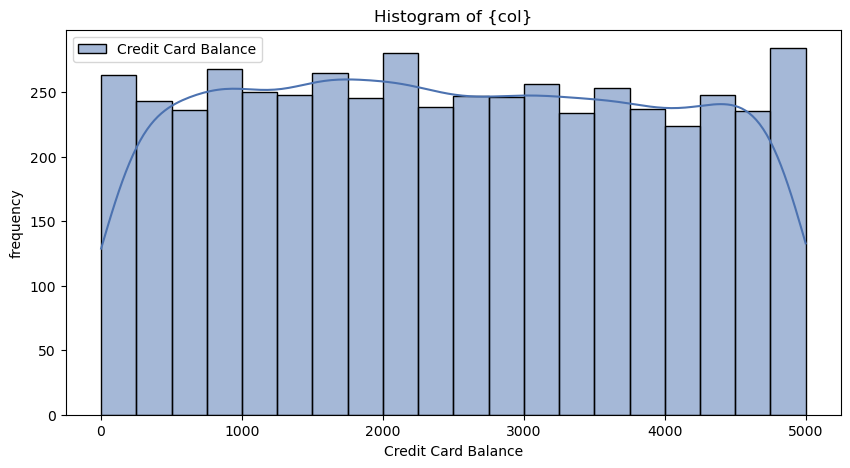

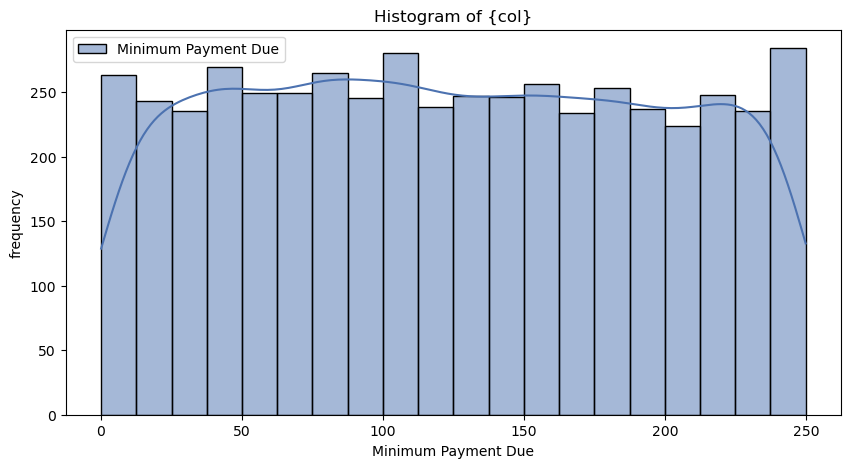

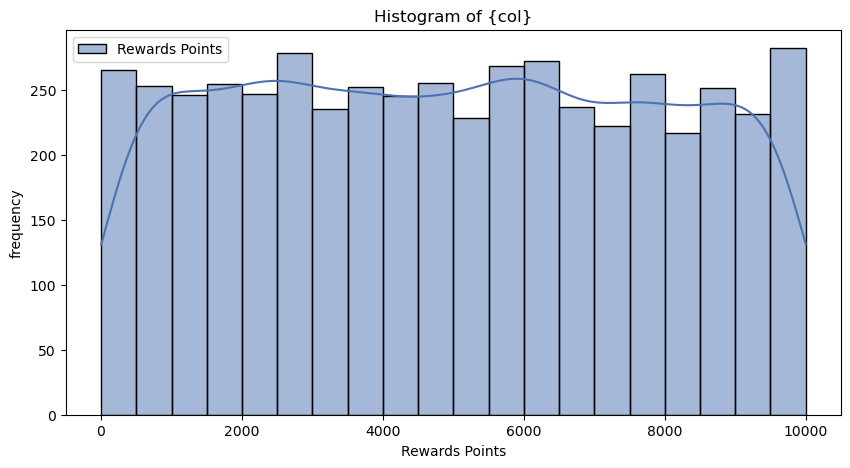

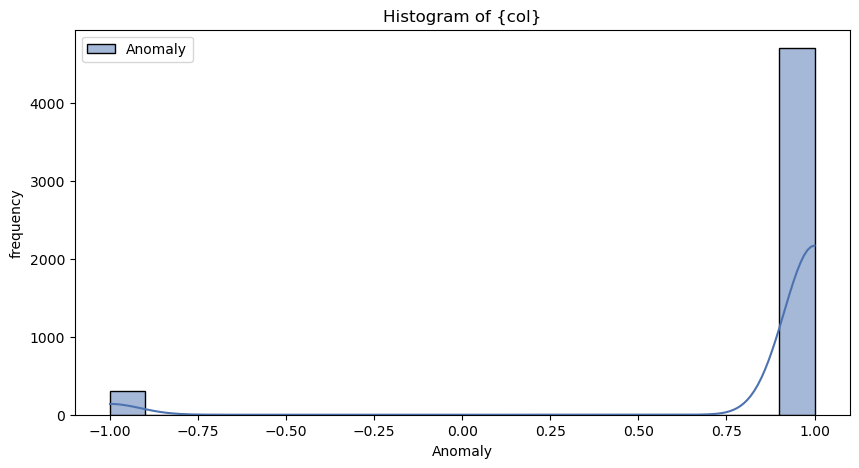

In [28]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[[col]], kde=True, palette='deep', bins=20)
    plt.title('Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.tight_layout
    plt.show()

### 2. Countplot Of Cat_Cols

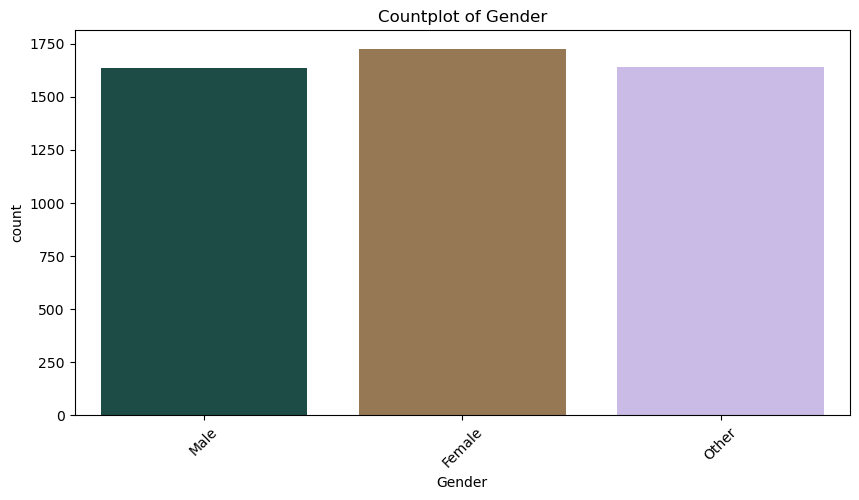

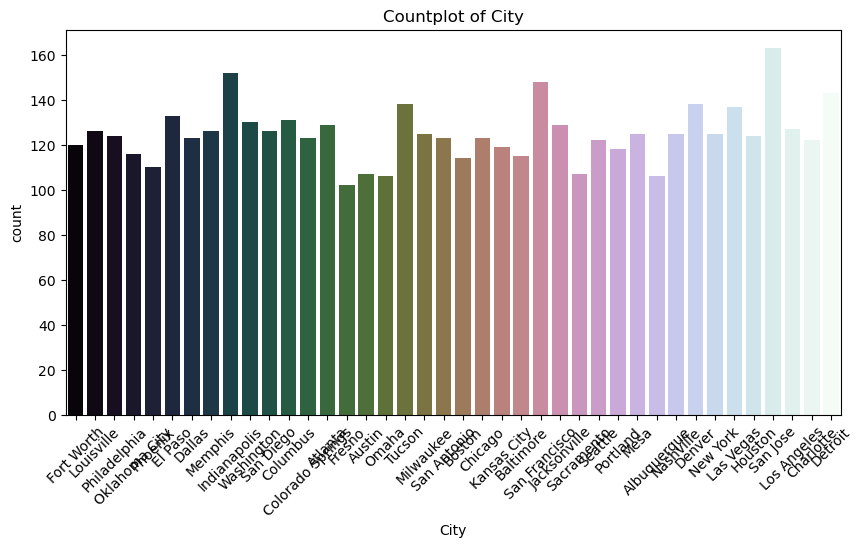

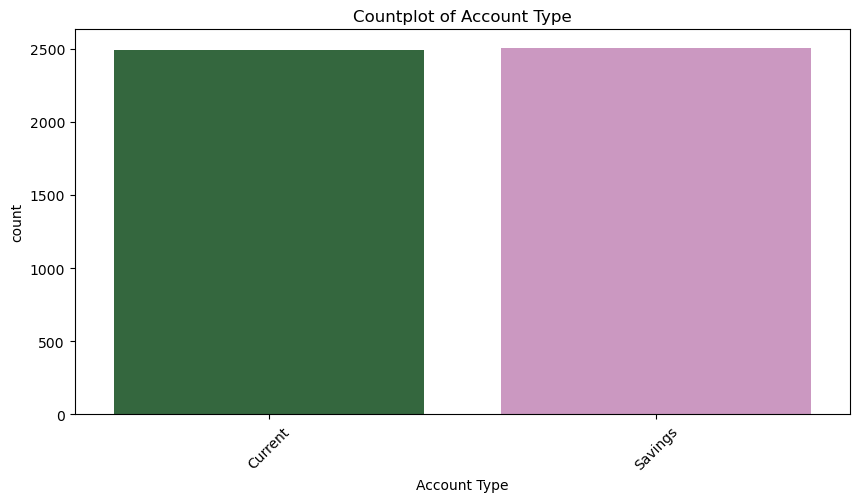

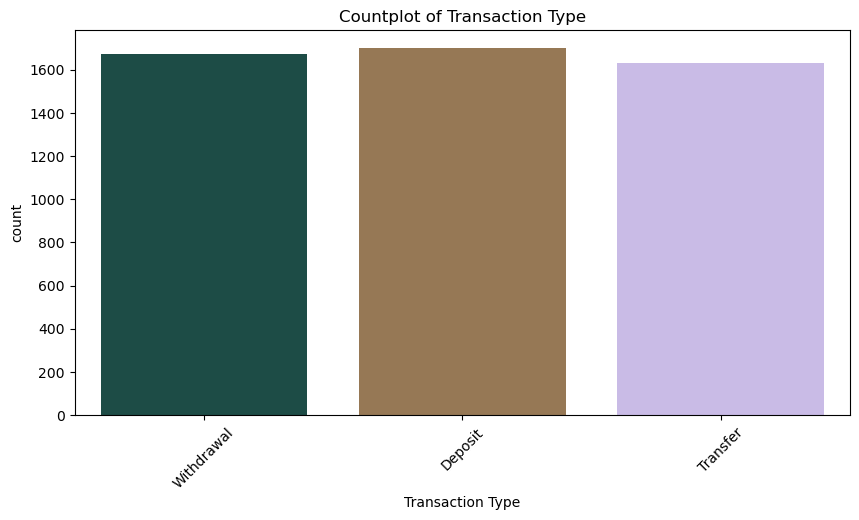

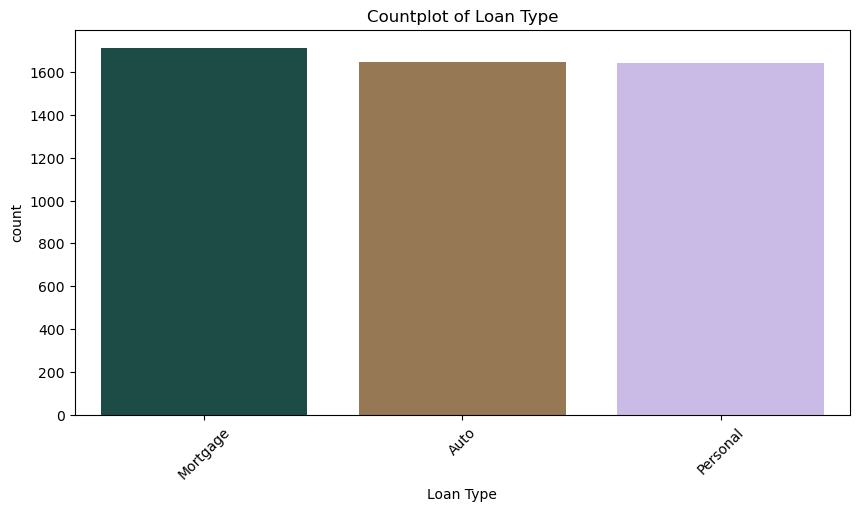

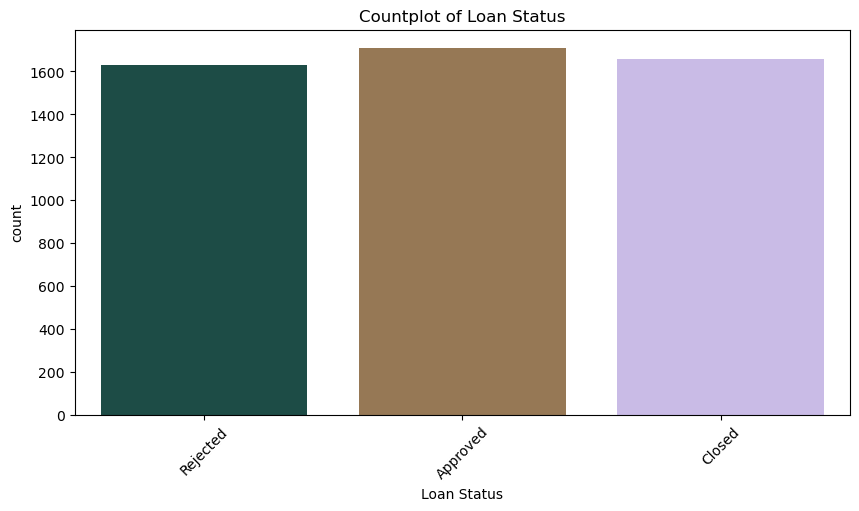

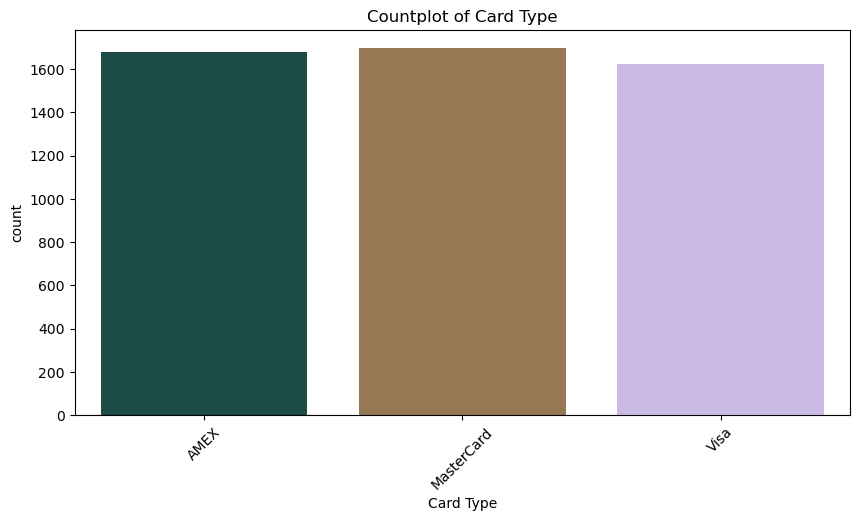

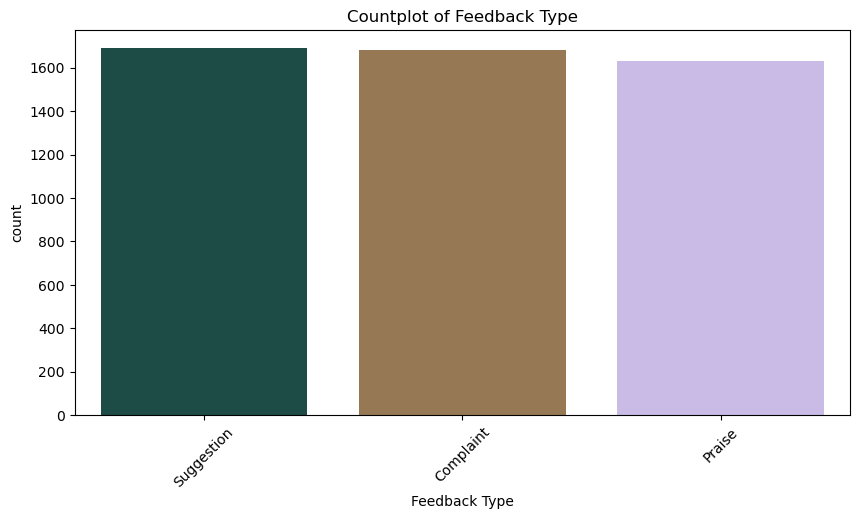

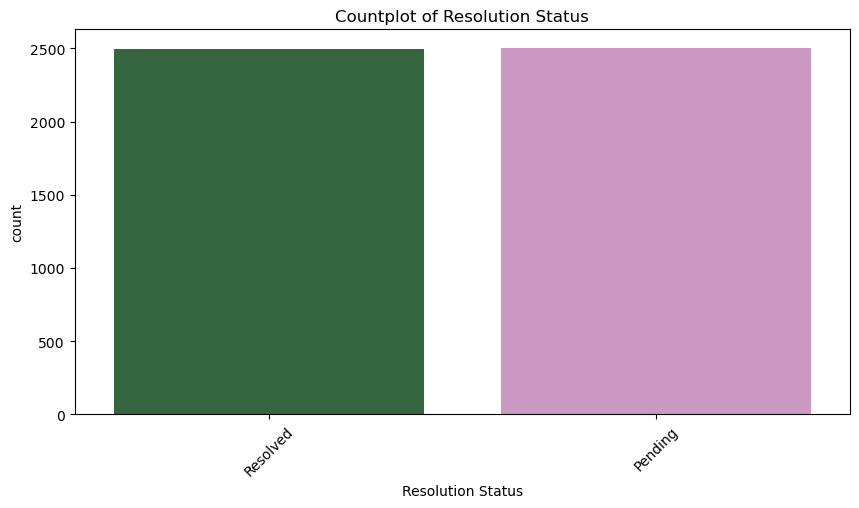

In [30]:
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='cubehelix')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.tight_layout
    plt.show()

### 3. Transaction Amount vs Account Balance After Transaction

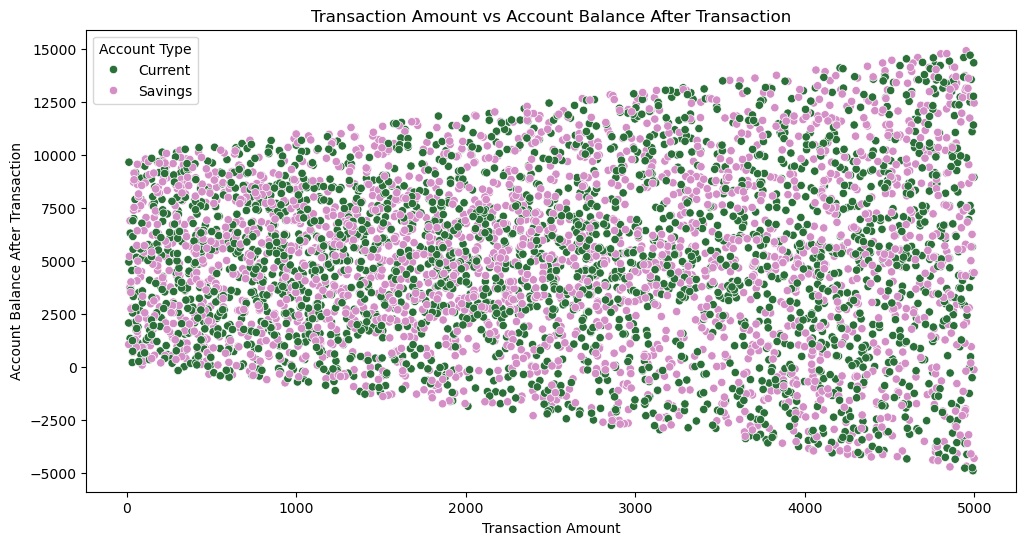

In [34]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Transaction Amount'], y=df['Account Balance After Transaction'], hue=df['Account Type'], palette='cubehelix')
plt.title('Transaction Amount vs Account Balance After Transaction')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance After Transaction')
plt.show()

### 4. Transaction Amount By Gender

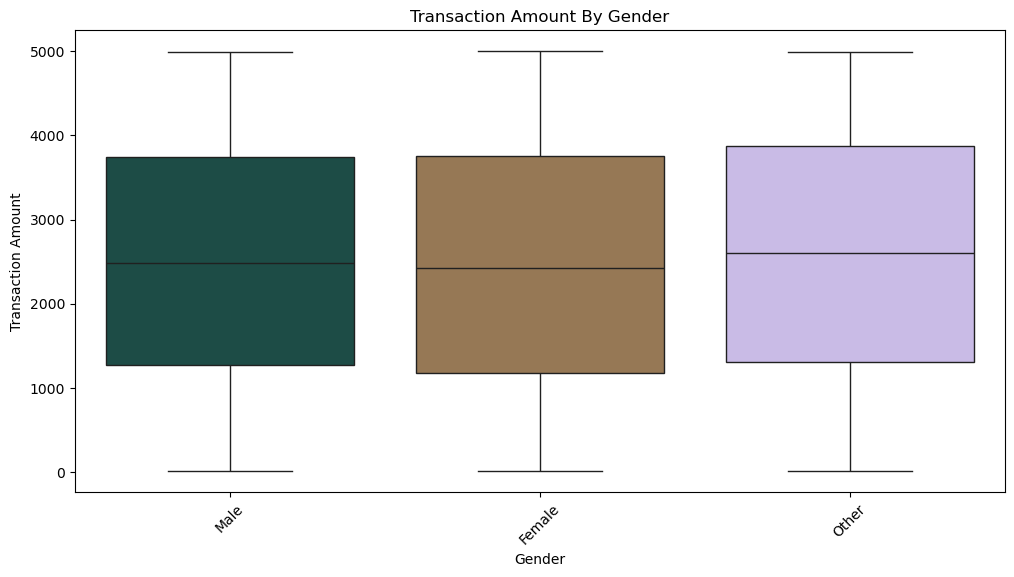

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Gender'], y=df['Transaction Amount'], data=df, palette='cubehelix')
plt.title('Transaction Amount By Gender')
plt.xlabel('Gender')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()

### 5. Loan Type By City

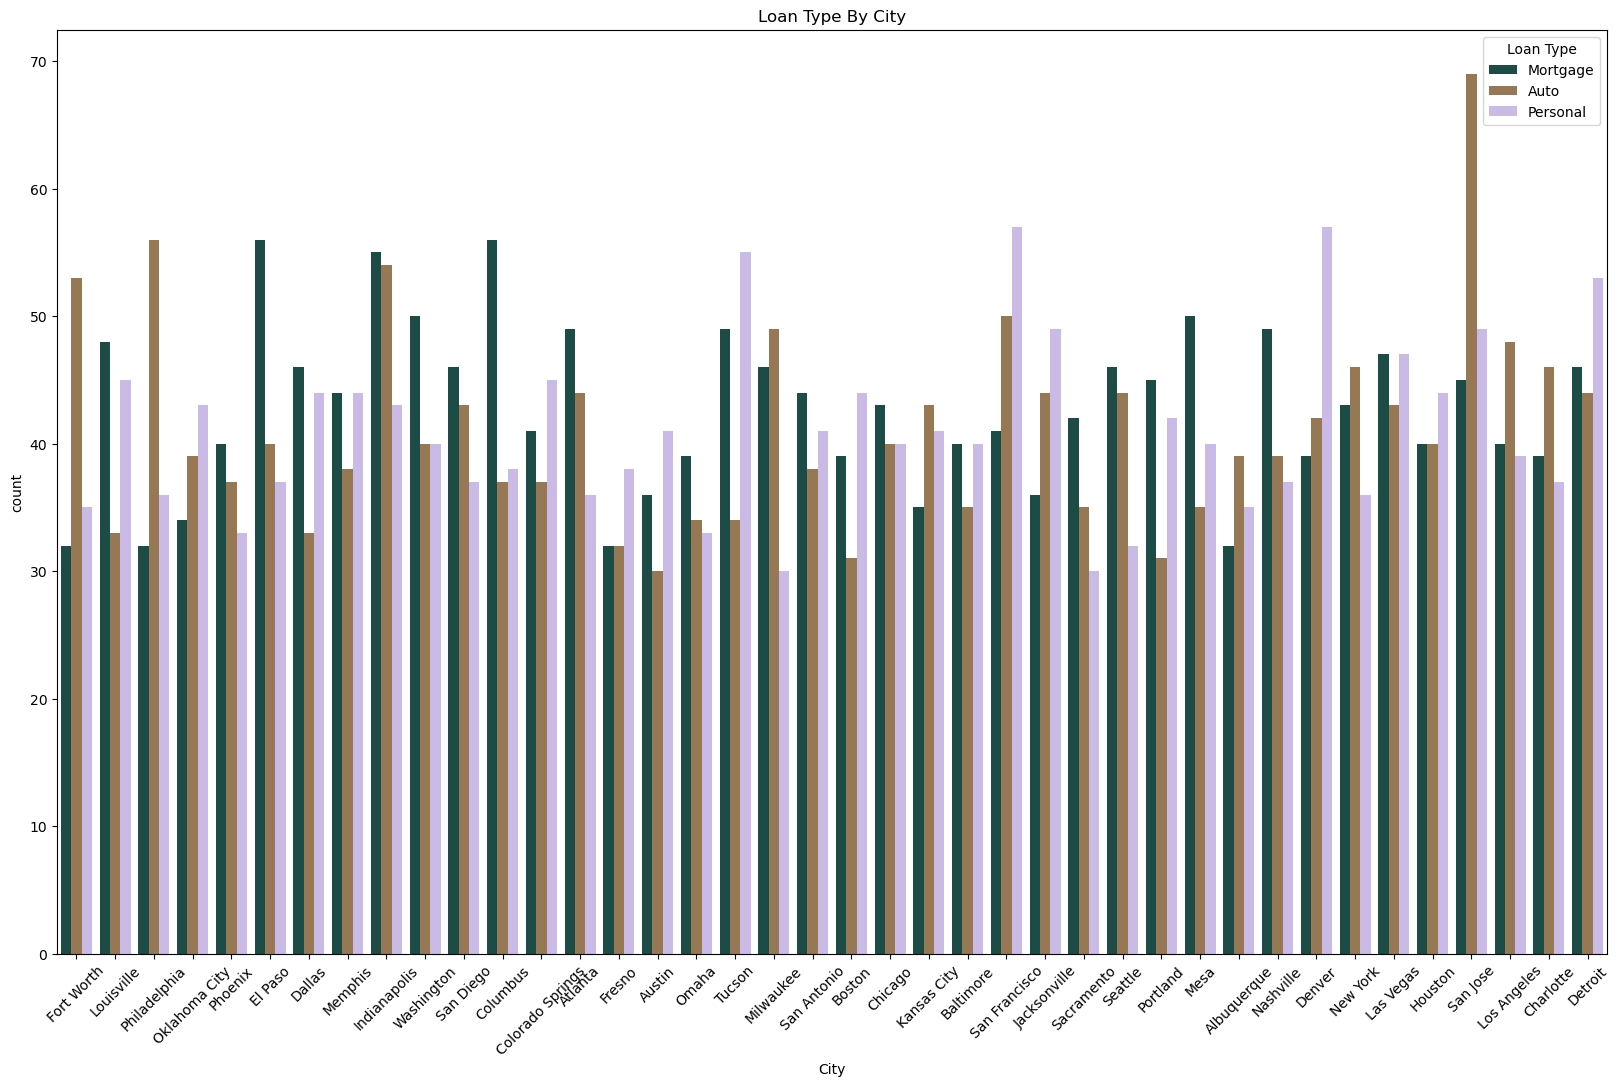

In [41]:
plt.figure(figsize=(20, 12))
sns.countplot(x=df['City'], hue=df['Loan Type'], palette='cubehelix')
plt.title('Loan Type By City')
plt.xlabel('City')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.legend(title='Loan Type')
plt.show()

### 6. Transaction Amount By Transaction Date

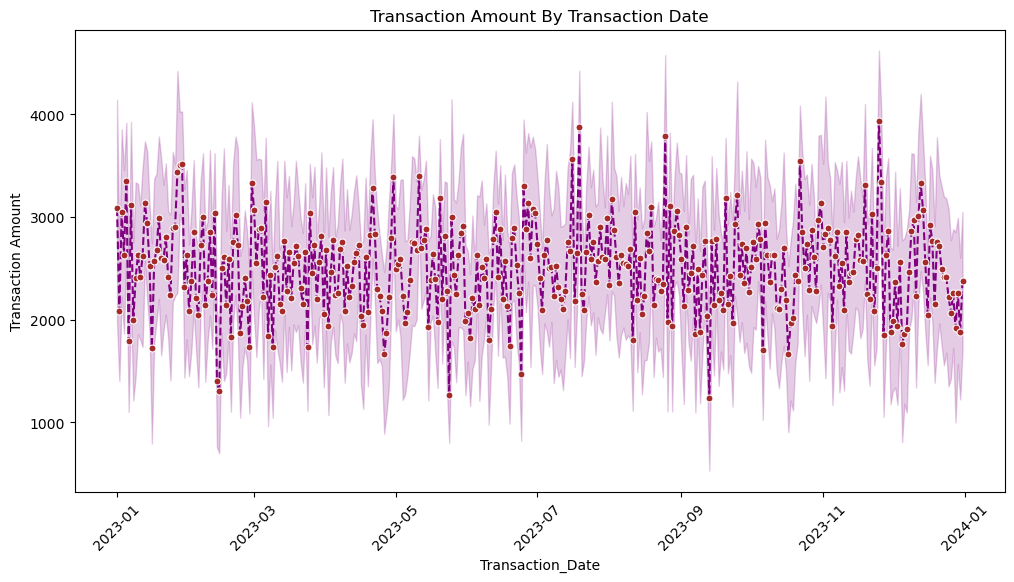

In [46]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Transaction_Date'], y=df['Transaction Amount'], marker='o', linestyle='dashed', markerfacecolor='brown', markersize=5, color='purple')
plt.title('Transaction Amount By Transaction Date')
plt.xlabel('Transaction_Date')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()

### 7. Credit Limit vs Credit Card Balance

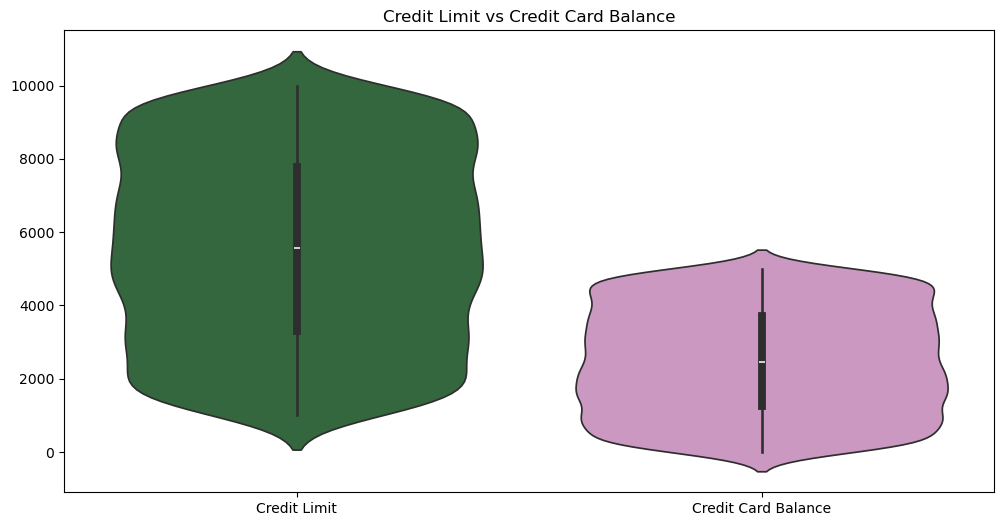

In [47]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['Credit Limit','Credit Card Balance']], palette='cubehelix')
plt.title('Credit Limit vs Credit Card Balance')
plt.show()

### 8. Correlation Map

In [51]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df

,Customer ID,Age,Contact Number,Account Balance,TransactionID,Transaction Amount,Account Balance After Transaction,Branch ID,Loan ID,Loan Amount,Interest Rate,Loan Term,CardID,Credit Limit,Credit Card Balance,Minimum Payment Due,Rewards Points,Feedback ID,Anomaly
0,1,45,19458794854,1313.38,1,1457.61,2770.99,43,1,32200.06,2.64,36,1,1737.88,4524.32,226.22,8142,1,1
1,2,47,19458794855,5988.46,2,1660.99,7649.45,63,2,47743.52,2.48,36,2,1799.36,856.70,42.84,4306,2,1
2,3,25,19458794856,8277.88,3,839.91,7437.97,82,3,47981.31,7.84,24,3,6112.96,3242.36,162.12,4842,3,1
3,4,52,19458794857,7487.21,4,4908.89,12396.10,41,4,4482.80,7.21,48,4,2069.41,4329.17,216.46,9463,4,1
4,5,68,19458794858,6993.55,5,589.07,6404.48,9,5,1092.33,5.37,12,5,2765.30,25.72,1.29,2209,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,21,19458799849,5564.12,4996,1612.91,7177.03,33,4996,34684.98,4.07,48,4996,4347.17,2017.13,100.86,7530,4996,1
4996,4997,27,19458799850,2625.13,4997,2493.45,5118.58,17,4997,45181.31,7.47,48,4997,8379.59,853.33,42.67,8796,4997,1
4997,4998,45,19458799851,2732.76,4998,418.38,2314.38,32,4998,44660.01,7.15,60,4998,8208.84,228.49,11.42,9966,4998,1
4998,4999,58,19458799852,3006.01,4999,3160.96,-154.95,76,4999,35551.65,8.82,24,4999,3083.35,325.37,16.27,538,4999,1


In [52]:
correlation = numeric_df.corr()

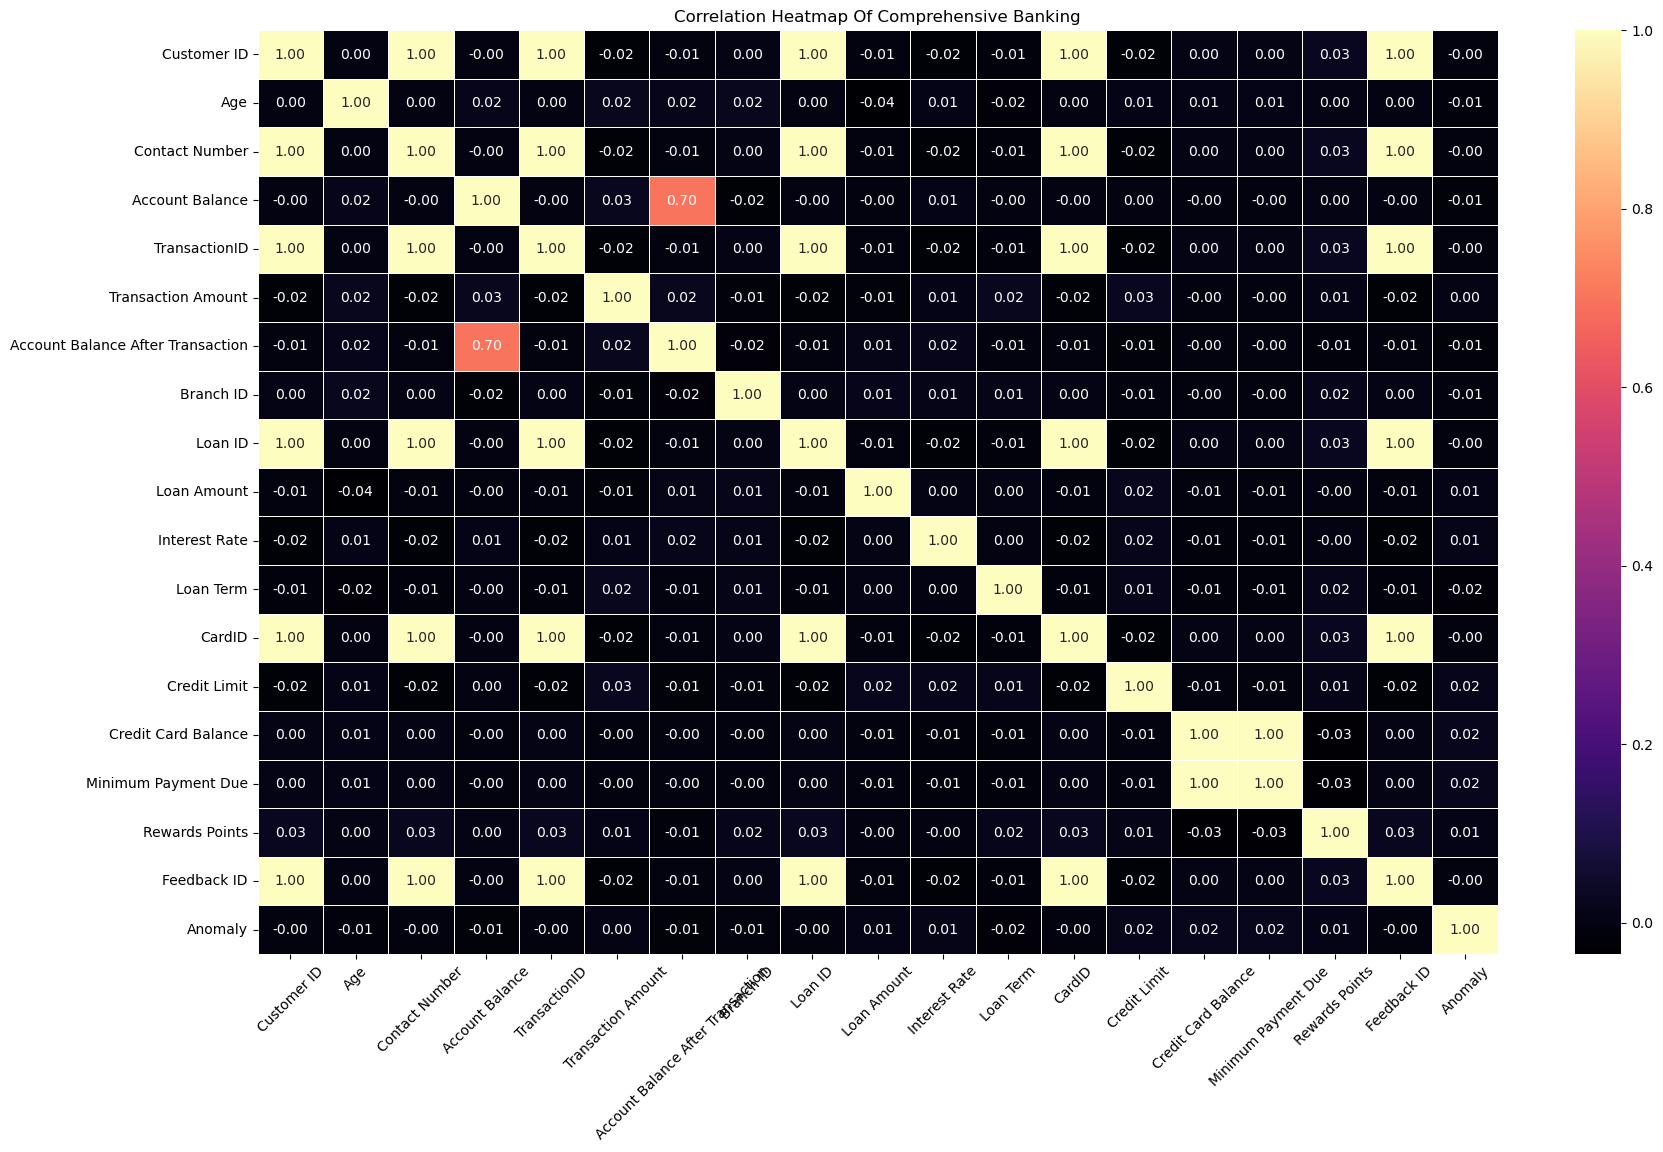

In [54]:
plt.figure(figsize=(20, 12))
sns.heatmap(correlation, annot=True, cmap='magma', fmt='.2f', linewidth=0.5)
plt.title('Correlation Heatmap Of Comprehensive Banking')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()